In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image

In [ ]:
drive.mount('/content/drive')
!unzip -n '/content/drive/MyDrive/DEEP_LEARNING/DL_flowers.zip'

Mounted at /content/drive
Archive:  /content/drive/MyDrive/DEEP_LEARNING/DL_flowers.zip
   creating: flowers/
  inflating: flowers/labels.csv      
   creating: flowers/images/
  inflating: flowers/images/16209331331_343c899d38.jpg  
  inflating: flowers/images/6204049536_1ac4f09232_n.jpg  
  inflating: flowers/images/9965757055_ff01b5ee6f_n.jpg  
  inflating: flowers/images/5001848317_b33d17ab7a_n.jpg  
  inflating: flowers/images/18828283553_e46504ae38.jpg  
  inflating: flowers/images/18302701228_2b5790b199_n.jpg  
  inflating: flowers/images/461632542_0387557eff.jpg  
  inflating: flowers/images/14167534527_781ceb1b7a_n.jpg  
  inflating: flowers/images/5700466891_2bcb17fa68_n.jpg  
  inflating: flowers/images/14087792403_f34f37ba3b_m.jpg  
  inflating: flowers/images/8021568040_f891223c44_n.jpg  
  inflating: flowers/images/34718882165_68cdc9def9_n.jpg  
  inflating: flowers/images/5777669976_a205f61e5b.jpg  
  inflating: flowers/images/3446285408_4be9c0fded_m.jpg  
  inflating: f

In [ ]:
data_path = "flowers/"
imgs_path = data_path + "images/"
labels_path = data_path + "labels.csv"

In [ ]:
labels = pd.read_csv(labels_path,dtype = {"class":"category"})

In [ ]:
seed = 0
train_data,test_data = train_test_split(labels,test_size = 0.3,random_state = seed)
dev_data,test_data = train_test_split(test_data,test_size = 0.5,random_state= seed)

In [ ]:
train_data = train_data.reset_index(drop = True)
dev_data = dev_data.reset_index(drop = True)
test_data = test_data.reset_index(drop = True)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

classes = ["0","1","2","3","4"]
n_classes = len(classes)
img_width = img_height = 234
x_col = 'image_name'
y_col = 'class'

In [ ]:
batch_size = 128
train_generator = datagen.flow_from_dataframe(dataframe = train_data, directory = imgs_path, x_col = x_col, y_col = y_col, class_mode = "categorical", target_size = (img_width, img_height), batch_size= batch_size, classes= classes)
dev_generator = datagen.flow_from_dataframe(dataframe = dev_data, directory = imgs_path, x_col = x_col, y_col = y_col, class_mode = "categorical", target_size = (img_width, img_height), batch_size= batch_size, classes= classes)
test_generator = datagen.flow_from_dataframe(dataframe = test_data, directory = imgs_path, x_col = x_col, y_col = y_col, class_mode = "categorical", target_size = (img_width, img_height), batch_size= batch_size, classes= classes)

Found 3020 validated image filenames belonging to 5 classes.
Found 647 validated image filenames belonging to 5 classes.
Found 648 validated image filenames belonging to 5 classes.


In [ ]:
base_model = tf.keras.applications.InceptionV3(weights= "imagenet", include_top= False, input_shape = (img_width,img_height,3))

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation= "relu")(x)

predictions = tf.keras.layers.Dense(n_classes, activation= "softmax")(x)

In [ ]:
model = tf.keras.models.Model(inputs = [base_model.input], outputs = [predictions])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 234, 234, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 116, 116, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 116, 116, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-5), metrics = ["accuracy"])

In [ ]:
history = model.fit(train_generator, epochs= 10, verbose = 2, steps_per_epoch= len(train_data)/batch_size,validation_data = dev_generator, validation_steps = len(dev_data)/batch_size)

Epoch 1/10
23/23 - 34s - loss: 1.5271 - accuracy: 0.3570 - val_loss: 1.2914 - val_accuracy: 0.5255 - 34s/epoch - 1s/step
Epoch 2/10
23/23 - 14s - loss: 1.1664 - accuracy: 0.6033 - val_loss: 1.0346 - val_accuracy: 0.6739 - 14s/epoch - 574ms/step
Epoch 3/10
23/23 - 13s - loss: 0.9540 - accuracy: 0.6927 - val_loss: 0.8900 - val_accuracy: 0.7172 - 13s/epoch - 549ms/step
Epoch 4/10
23/23 - 13s - loss: 0.8272 - accuracy: 0.7361 - val_loss: 0.7965 - val_accuracy: 0.7527 - 13s/epoch - 564ms/step
Epoch 5/10
23/23 - 13s - loss: 0.7444 - accuracy: 0.7616 - val_loss: 0.7330 - val_accuracy: 0.7682 - 13s/epoch - 567ms/step
Epoch 6/10
23/23 - 13s - loss: 0.6807 - accuracy: 0.7791 - val_loss: 0.6876 - val_accuracy: 0.7805 - 13s/epoch - 567ms/step
Epoch 7/10
23/23 - 14s - loss: 0.6329 - accuracy: 0.7924 - val_loss: 0.6475 - val_accuracy: 0.7898 - 14s/epoch - 574ms/step
Epoch 8/10
23/23 - 13s - loss: 0.5934 - accuracy: 0.8030 - val_loss: 0.6172 - val_accuracy: 0.7944 - 13s/epoch - 567ms/step
Epoch 9/10


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps = len(test_data)/batch_size, verbose = 1)
print(f"test_loss: {test_loss:.4f}, test_acc: {test_acc:.4f}")

5/5 [==============================] - 3s 523ms/step - loss: 0.5715 - accuracy: 0.8102
test_loss: 0.5715, test_acc: 0.8102


In [ ]:
# predictios = 
predictions = model.predict(test_generator)

In [ ]:
predictions[0]

array([0.30918533, 0.1466247 , 0.0760197 , 0.38433707, 0.08383317],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
test_generator[0]

(array([[[[0.45098042, 0.45882356, 0.5058824 ],
          [0.45882356, 0.4666667 , 0.5137255 ],
          [0.47058827, 0.4784314 , 0.5254902 ],
          ...,
          [0.43921572, 0.44705886, 0.5058824 ],
          [0.36078432, 0.36862746, 0.41960788],
          [0.25882354, 0.26666668, 0.31764707]],
 
         [[0.47058827, 0.5019608 , 0.5137255 ],
          [0.49411768, 0.5254902 , 0.5372549 ],
          [0.5137255 , 0.54509807, 0.5568628 ],
          ...,
          [0.4431373 , 0.45098042, 0.50980395],
          [0.427451  , 0.43529415, 0.48627454],
          [0.4039216 , 0.41176474, 0.46274513]],
 
         [[0.47058827, 0.5019608 , 0.5137255 ],
          [0.49411768, 0.5254902 , 0.5372549 ],
          [0.5137255 , 0.54509807, 0.5568628 ],
          ...,
          [0.4431373 , 0.45098042, 0.50980395],
          [0.427451  , 0.43529415, 0.48627454],
          [0.4039216 , 0.41176474, 0.46274513]],
 
         ...,
 
         [[0.2392157 , 0.22352943, 0.3137255 ],
          [0.25882

In [ ]:
!pip install pillow

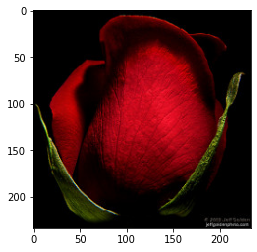

In [ ]:
img_path = './flowers/images/3407482427_49d5c75291_m.jpg'
image_size = 234


img = image.load_img(img_path, target_size=(image_size, image_size))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [ ]:
prediction = model.predict(x)
prediction
classes = np.argmax(prediction, axis = 1)
print(classes)

[4]


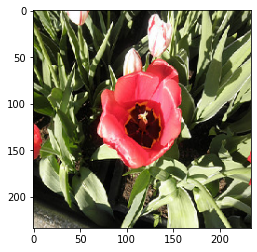

In [ ]:
img_path = './flowers/images/7481215720_73e40f178f_n.jpg'
image_size = 234


img = image.load_img(img_path, target_size=(image_size, image_size))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [ ]:
prediction = model.predict(x)
prediction
classes = np.argmax(prediction, axis = 1)
print(classes)

[2]


classes = ["0","1","2","3","4"]
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']